### CS613 Final Project
### Notebook 2: Modeling and Performance
### Submitted by: John Obuch, Fatih Catpinar, Meghan Colosimo, Colin Murphy
### 3/19/20

In [1]:
# import modules

import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt

# Defines global namespace
namespace = __import__(__name__)

# Part 2: Apply scikit-learn classifiers to preprocessed data

## 1. Import scikit-learn modules

In [2]:
# import scikit-learn modules

from sklearn.linear_model import LogisticRegression  # LogisticRegression
from sklearn.naive_bayes import GaussianNB # GaussianNB
from sklearn.ensemble import RandomForestClassifier # RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier # DecisionTreeClassifier

# Performance metric modules
# ROC AUC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# precision-recall curve and f1
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve

# confusion matrices
from sklearn.metrics import plot_confusion_matrix

# feature importance
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import RFE  
from sklearn.feature_selection import SelectFromModel
from mlxtend.evaluate import feature_importance_permutation

## 2. Load preprocecessed data

In [3]:
# Unpickling data

# Unpickling Diabetes dataframes
X_train_diabetes = pd.read_pickle("./os_X_diabetes.pkl")
y_train_diabetes = pd.read_pickle("./os_y_diabetes.pkl")
X_test_diabetes = pd.read_pickle("./X_test_diabetes.pkl")
y_test_diabetes = pd.read_pickle("./y_test_diabetes.pkl")

# Unpickling Heart Disease/Heart Attack dataframes
X_train_heart = pd.read_pickle("./os_X_heart.pkl")
y_train_heart = pd.read_pickle("./os_y_heart.pkl")
X_test_heart = pd.read_pickle("./X_test_heart.pkl")
y_test_heart = pd.read_pickle("./y_test_heart.pkl")

# Unpickling Hypertension dataframes
X_train_hypertension = pd.read_pickle("./os_X_hypertension.pkl")
y_train_hypertension = pd.read_pickle("./os_y_hypertension.pkl")
X_test_hypertension = pd.read_pickle("./X_test_hypertension.pkl")
y_test_hypertension = pd.read_pickle("./y_test_hypertension.pkl")

In [4]:
# Convert train and test data to numpy and rename

# Diabetes
X_train_diabetes = np.array(X_train_diabetes)
y_train_diabetes = np.array(y_train_diabetes.values.ravel()) # convert data to 1-D array
X_test_diabetes = np.array(X_test_diabetes)
y_test_diabetes = np.array(y_test_diabetes.values.ravel())

# Heart Disease/Heart Attack
X_train_heart = np.array(X_train_heart)
y_train_heart = np.array(y_train_heart.values.ravel())
X_test_heart = np.array(X_test_heart)
y_test_heart = np.array(y_test_heart.values.ravel())

# Hypertension
X_train_hypertension = np.array(X_train_hypertension)
y_train_hypertension = np.array(y_train_hypertension.values.ravel())
X_test_hypertension = np.array(X_test_hypertension)
y_test_hypertension = np.array(y_test_hypertension.values.ravel())

# Note: 
# used same variable name and replaced the data to avoid memory error
# converted y_test datas to 1-D array, sklearn requires. Example: shape from (500,1) to (500,)

## 3. Define a function to calculate performance

In [11]:
# define a function to print recall, precision, f1 and accuracy
# for binary classifications

def print_results(y_test, y_pred):
    
    '''
    This function takes the labels and predictions,
    and prints result summary.
    '''
    
    TP = sum(y_pred + y_test == 2) # it is 1, prediction says 1
    FP = sum(y_pred - y_test == 1) # it is 0, prediction says 1
    TN = sum(y_pred + y_test == 0) # it is 0, prediction says 0
    FN = sum(y_pred - y_test == -1) # it is 1, prediction says 0

    print("\nResults Summary:\n")
    print("True Positive:", TP)
    print("False Positive:", FP)
    print("True Negative:", TN)
    print("False Negative:", FN)

    accuracy = (TP + TN) / (TP + FP + TN + FN)
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    f1 = (2*precision*recall) / (precision + recall)

    print("\nPrecision:", precision)
    print("Recall:", recall)
    print("F1:", f1)
    print("Accuracy:", accuracy)

## 4. Define a function to apply selected classifiers

In [12]:
def apply_selected_classifiers(X_train, y_train, X_test, y_test):

    # LogisticRegression
    clf = LogisticRegression().fit(X_train, y_train) 
    y_pred =  clf.predict(X_test)
    print("\nLogisticRegression:")
    print_results(y_test, y_pred)

    # GaussianNB
    clf = GaussianNB().fit(X_train, y_train)
    y_pred =  clf.predict(X_test)
    print("\nGaussianNB:")
    print_results(y_test, y_pred)

    # DecisionTreeClassifier
    clf = DecisionTreeClassifier(max_depth=5).fit(X_train, y_train)
    y_pred =  clf.predict(X_test)
    print("\nDecisionTreeClassifier:")
    print_results(y_test, y_pred)

    # RandomForestClassifier
    clf = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1).fit(X_train, y_train)
    y_pred =  clf.predict(X_test)
    print("\nRandomForestClassifier:")
    print_results(y_test, y_pred)

## 5. Results for Diabetes, Heart Disease/Heart, Hypertension Classification

In [19]:
print("Diabetes:")
print("-------------------")
apply_selected_classifiers(X_train_diabetes, y_train_diabetes, X_test_diabetes, y_test_diabetes)

print("Heart Disease/Heart")
print("-------------------")
apply_selected_classifiers(X_train_heart, y_train_heart, X_test_heart, y_test_heart)

print("Hypertension")
print("-------------------")
apply_selected_classifiers(X_train_hypertension, y_train_hypertension, X_test_hypertension, y_test_hypertension)

Diabetes:
-------------------


C:\Users\megha\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)



LogisticRegression:

Results Summary:

True Positive: 8824
False Positive: 7290
True Negative: 108647
False Negative: 10244

Precision: 0.5475983616730793
Recall: 0.4627648416194672
F1: 0.5016201466659087
Accuracy: 0.8701233287656013

GaussianNB:

Results Summary:

True Positive: 11063
False Positive: 35523
True Negative: 80414
False Negative: 8005

Precision: 0.23747477783024942
Recall: 0.5801867002307531
F1: 0.33700916928138425
Accuracy: 0.6775823117662308

DecisionTreeClassifier:

Results Summary:

True Positive: 9606
False Positive: 17750
True Negative: 98187
False Negative: 9462

Precision: 0.35114782862991667
Recall: 0.5037759597230963
F1: 0.4138376701706014
Accuracy: 0.7984370949224103

RandomForestClassifier:

Results Summary:

True Positive: 11857
False Positive: 51222
True Negative: 64715
False Negative: 7211

Precision: 0.18797063999112223
Recall: 0.6218271449548982
F1: 0.28867761452031115
Accuracy: 0.567178993370616
Heart Disease/Heart
-------------------


C:\Users\megha\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)



LogisticRegression:

Results Summary:

True Positive: 3401
False Positive: 4482
True Negative: 118727
False Negative: 8395

Precision: 0.4314347329696816
Recall: 0.28831807392336384
F1: 0.3456476446973932
Accuracy: 0.9046183474686122

GaussianNB:

Results Summary:

True Positive: 5549
False Positive: 32223
True Negative: 90986
False Negative: 6247

Precision: 0.14690776236365563
Recall: 0.4704136995591726
F1: 0.22389444803098776
Accuracy: 0.7150475908299693

DecisionTreeClassifier:

Results Summary:

True Positive: 3988
False Positive: 9227
True Negative: 113982
False Negative: 7808

Precision: 0.30177828225501324
Recall: 0.3380807053238386
F1: 0.31889968413897885
Accuracy: 0.873819488167105

RandomForestClassifier:

Results Summary:

True Positive: 5870
False Positive: 28625
True Negative: 94584
False Negative: 5926

Precision: 0.17016958979562255
Recall: 0.4976263140047474
F1: 0.2536130133287248
Accuracy: 0.7440761453279509
Hypertension
-------------------


C:\Users\megha\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)



LogisticRegression:

Results Summary:

True Positive: 37302
False Positive: 16889
True Negative: 63833
False Negative: 16981

Precision: 0.6883430827997269
Recall: 0.6871764640863622
F1: 0.6877592787211683
Accuracy: 0.7491204029480389

GaussianNB:

Results Summary:

True Positive: 44882
False Positive: 42991
True Negative: 37731
False Negative: 9401

Precision: 0.5107598465967931
Recall: 0.8268150249617744
F1: 0.6314471425757617
Accuracy: 0.6119254842413244

DecisionTreeClassifier:

Results Summary:

True Positive: 37720
False Positive: 23105
True Negative: 57617
False Negative: 16563

Precision: 0.6201397451705714
Recall: 0.6948768491056132
F1: 0.6553845084616187
Accuracy: 0.7061738454131329

RandomForestClassifier:

Results Summary:

True Positive: 44886
False Positive: 51059
True Negative: 29663
False Negative: 9397

Precision: 0.46783052790661317
Recall: 0.8268887128566955
F1: 0.597571691029635
Accuracy: 0.5521943631717344


## 6. Define functions for PCA

In [13]:
def standardize(X_train, X_test):
    
    #compute mean and standard deviation of training set
    Mu_train = np.mean(X_train, axis = 0)
    Sigma_train = np.std(X_train, axis = 0, ddof = 1)

    #standardize the train and test X data
    X_train_stdz = (X_train - Mu_train)/Sigma_train
    X_test_stdz = (X_test - Mu_train)/Sigma_train
    
    return X_train_stdz, X_test_stdz

In [14]:
def calculate_eigs_PCA(X_train_stdz):

    #compute covariance matrix
    X_train_cov = (X_train_stdz.T @ X_train_stdz) / (X_train_stdz.shape[0] - 1)

    #Compute the eigen values and eigen vectors of the covariance matrix
    e_val, e_vec = np.linalg.eig(X_train_cov)

    #keep track of orignal index position to obtain associated eigen vectors
    indx_val_list = []
    for indx, elem in enumerate(e_val):
        indx_val_list.append((indx, elem)) 

    #sort the eigen values from largest to smallest
    indx_val_list.sort(key = lambda x : x[1], reverse=True)

    best_vec_indx = []
    srtd_evals = []
    for item in indx_val_list:
        best_vec_indx.append(item[0])
        srtd_evals.append(item[1])

    #get the sorted eigen vectors
    srtd_vecs = []
    for i in range(len(best_vec_indx)):
        srtd_vecs.append(e_vec[:, best_vec_indx[i]])

    #cast to a numpy array
    srtd_vecs = np.array(srtd_vecs).T
    srtd_evals = np.array(srtd_evals)

    return srtd_evals, srtd_vecs

In [15]:
def find_k(srtd_evals, value=95):

    #determine the number of principle components needed to encode at least 95% of the information, k.
    k = 0
    percent = 0
    sum_lambda = np.sum(srtd_evals)
    for i in range(srtd_evals.shape[0]):
        percent = np.sum(srtd_evals[0:i])/sum_lambda
        k += 1
        if (percent >= (value/100)):
            break

    print("The number of principle components needed to encode 95% of the information is: "+str(k))
    return k

In [16]:
def perform_PCA(srtd_vecs, X_train_stdz, X_test_stdz, k):
    
    #project the X_train_stdz and X_test_stdz data onto the principle components
    W = srtd_vecs[:, 0:k]
    Z_train = X_train_stdz @ W
    Z_test = X_test_stdz @ W
    
    return Z_train.real, Z_test.real

## 7. Apply PCA on data

In [11]:
# for diabetes
evals_diabetes, vecs_diabetes = calculate_eigs_PCA(X_train_diabetes)
k_diabetes = find_k(evals_diabetes)
Z_train_diabetes, Z_test_diabetes = perform_PCA(vecs_diabetes, X_train_diabetes, X_test_diabetes, k_diabetes)

# for heart
evals_heart, vecs_heart = calculate_eigs_PCA(X_train_heart)
k_heart = find_k(evals_heart)
Z_train_heart, Z_test_heart = perform_PCA(vecs_heart, X_train_heart, X_test_heart, k_heart)

# for hypertension
evals_hypertension, vecs_hypertension = calculate_eigs_PCA(X_train_hypertension)
k_hypertension = find_k(evals_hypertension)
Z_train_hypertension, Z_test_hypertension = perform_PCA(vecs_hypertension, X_train_hypertension, X_test_hypertension, k_hypertension)

The number of principle components needed to encode 95% of the information is: 95
The number of principle components needed to encode 95% of the information is: 95
The number of principle components needed to encode 95% of the information is: 99


## 8. Perform Classification with PCA

In [12]:
print("Diabetes:")
print("-------------------")
apply_selected_classifiers(Z_train_diabetes, y_train_diabetes, Z_test_diabetes, y_test_diabetes)

print("Heart Disease/Heart")
print("-------------------")
apply_selected_classifiers(Z_train_heart, y_train_heart, Z_test_heart, y_test_heart)

print("Hypertension")
print("-------------------")
apply_selected_classifiers(Z_train_hypertension, y_train_hypertension, Z_test_hypertension, y_test_hypertension)

Diabetes:
-------------------


C:\Users\megha\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)



LogisticRegression:

Results Summary:

True Positive: 6555
False Positive: 8208
True Negative: 107729
False Negative: 12513

Precision: 0.444015444015444
Recall: 0.3437696664568911
F1: 0.38751440986077856
Accuracy: 0.8465167956742343

GaussianNB:

Results Summary:

True Positive: 7659
False Positive: 36500
True Negative: 79437
False Negative: 11409

Precision: 0.17344142756855907
Recall: 0.40166771554436753
F1: 0.24226991633321207
Accuracy: 0.645131661790304

DecisionTreeClassifier:

Results Summary:

True Positive: 3165
False Positive: 11966
True Negative: 103971
False Negative: 15903

Precision: 0.209173220540612
Recall: 0.16598489616110762
F1: 0.18509313137811048
Accuracy: 0.7935706084959816

RandomForestClassifier:

Results Summary:

True Positive: 8032
False Positive: 27987
True Negative: 87950
False Negative: 11036

Precision: 0.2229934201393709
Recall: 0.421229284665408
F1: 0.29161145097754465
Accuracy: 0.7109514462427318
Heart Disease/Heart
-------------------

LogisticRegress

# Part 3: Assess model performance/generate performance graphics

We create a class (generate_performance_graphics) that contains 4 methods which plot the following graphics for each model/disease outcome combination:

- <b>Recieving Operating Characteric : Area Under the Curve (ROC AUC)</b> --> plot_ROC
- <b>Percision-Recall Curves </b>--> plot_PR
- <b>Confusion Matrices </b> --> plot_confusion_matrices
- <b>Feature Importance </b>--> plot_feature_importance

In [5]:
class generate_performance_graphics():
    '''
    Defines a class that generates 4 types of model performance graphics:
    
    -Recieving Operating Characteristic AUC
    -Percision-Recall Curves
    -Confusion Matrices
    -Feature Importance Bar Graphs (top 20)
    
    @disease: str (valid arguments: 'diabetes', 'hypertension', 'heart')
    @model: str (valid arguments: 'LogisticRegression', 'GaussianNB', 'DecisionTreeClassifier', 'RandomForestClassifier')
    '''
    
    def __init__(self, disease, model):        
        '''
        Initalizes an instance of the generate_performance_graphics class
    
        @disease: str (valid arguments: 'diabetes', 'hypertension', 'heart')
        @model: str (valid arguments: 'LogisticRegression', 'GaussianNB', 'DecisionTreeClassifier', 'RandomForestClassifier')
        '''
        self.disease = disease
        self.model_name = model
        self.model = getattr(namespace, model)
        self.X_train = getattr(namespace, 'X_train_' + self.disease)
        self.X_test = getattr(namespace, 'X_test_' + self.disease)
        self.y_train = getattr(namespace, 'y_train_' + self.disease)
        self.y_test = getattr(namespace, 'y_test_' + self.disease)
        self.sklearn_model = self.model()
        self.sklearn_model.fit(self.X_train, self.y_train)
        
    
    def plot_ROC(self, disease, model):
        '''
        Plots ROC AUC curves for the specified disease(s) and model(s).
        
        @return: rendering of ROC AUC curve (figure also saved)
        '''
        roc_auc = roc_auc_score(self.y_train, self.sklearn_model.predict(self.X_train))
        print('ROC AUC for Model:', model, 'and Disease:', disease, '=', roc_auc)
        fpr, tpr, thresholds = roc_curve(self.y_test, self.sklearn_model.predict_proba(self.X_test)[:,1])

        plt.figure()
        plt.plot(fpr, tpr, label= model + '(area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1],'r--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic: ' + model + '\n' + disease)
        plt.legend(loc="lower right")
        plt.savefig(model + '_ROC_' + disease)
        plt.show()
        
        
    def plot_PR(self, disease, model):
        '''
        Plots Percision-Recall curves for the specified disease(s) and model(s).
        
        @return: rendering of PR curve (figure also saved)        
        '''
        # predict probabilities
        lr_probs = self.sklearn_model.predict_proba(self.X_test)

        # keep probabilities for the positive outcome only
        lr_probs = lr_probs[:, 1]

        # predict class values
        yhat = self.sklearn_model.predict(self.X_test)
        lr_precision, lr_recall, _ = precision_recall_curve(self.y_test, lr_probs)
        lr_f1, lr_auc = f1_score(self.y_test, yhat), auc(lr_recall, lr_precision)

        # summarize scores
        print('f1=%.3f auc=%.3f' % (lr_f1, lr_auc))

        # plot the precision-recall curves
        plt.plot(lr_recall, lr_precision, marker='.')
        # axis labels
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title('Receiver Operating Characteristic: ' + model + '\n' + disease)
        # show the plot
        plt.show()
        
    
    def plot_confusion_matrices(self, disease, model):
        '''
        Plots confusion matrices for the specified disease(s) and model(s).
        
        @return: rendering of confusion matrix (figure also saved)        
        '''      
        disp = plot_confusion_matrix(self.sklearn_model, self.X_test, self.y_test, cmap=plt.cm.Blues, values_format='.0f')
        plt.title('Confusion Matrix: ' + model + '\n' + disease)
        plt.savefig(model + '_ConfusionMatrix_' + disease)
        
    
    def plot_feature_importance(self, disease, model):
        '''
        Plots bar graphics displaying the top 20 features for the specified disease(s) and model(s),
        based on sklearn's permutation importance (for multicollinear/correlated features).
        
        @return: rendering of feature importance bar graph (figure also saved)
        '''        
      
        result = permutation_importance(self.sklearn_model, self.X_train, self.y_train, n_repeats=10,
                                random_state=42)
        
        perm_sorted_idx = result.importances_mean.argsort()
        
        if self.model_name == 'LogisticRegression':
            importance_sorted_idx = np.argsort(self.sklearn_model.coef_)
            indices = np.arange(0, len(self.sklearn_model.coef_[:20])) + 0.5
            
        else:
            importance_sorted_idx = np.argsort(self.sklearn_model.feature_importances_)
            indices = np.arange(0, len(self.sklearn_model.feature_importances_[:20])) + 0.5

        plt.figure
        plt.barh(indices,
                 self.sklearn_model.feature_importances_[importance_sorted_idx][:20], height=0.7)
        plt.set_yticklabels(self.X_train.columns[importance_sorted_idx][:20])
        plt.set_yticks(indices)
        plt.set_ylim((0, len(self.sklearn_model.feature_importances_[:20])))              
        plt.title('Permutation Feature Importance: ' + model + '\n' + disease)
        plt.savefig(model + '_FeatureImportance_' + disease)
        plt.show()      
        

C:\Users\megha\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Performance Graphics for: diabetes 

Model: LogisticRegression 

ROC AUC for Model: LogisticRegression and Disease: diabetes = 0.9272514758318661


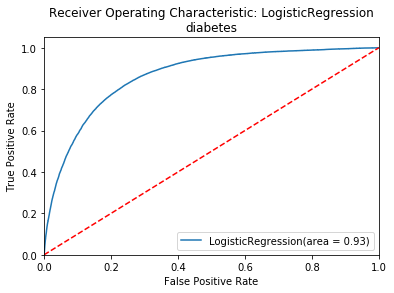

f1=0.502 auc=0.519


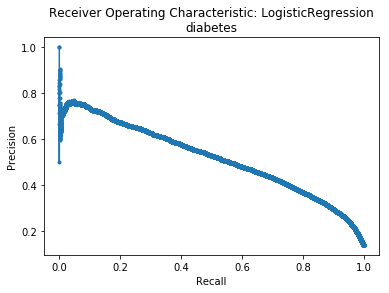

Performance Graphics for: diabetes 

Model: GaussianNB 

ROC AUC for Model: GaussianNB and Disease: diabetes = 0.8107865185163265


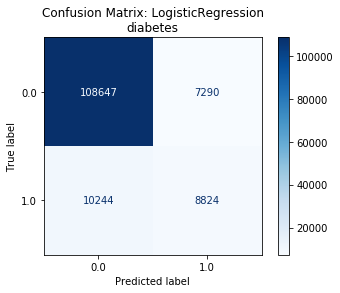

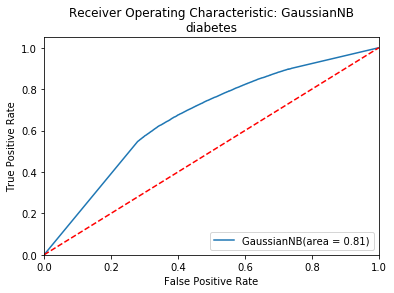

f1=0.337 auc=0.427


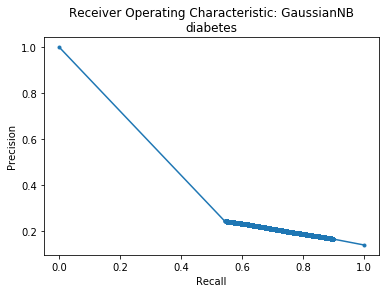

Performance Graphics for: diabetes 

Model: DecisionTreeClassifier 

ROC AUC for Model: DecisionTreeClassifier and Disease: diabetes = 1.0


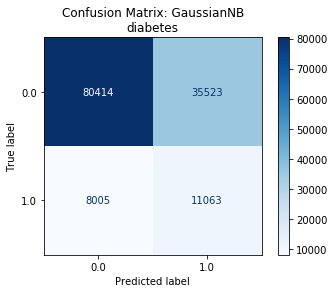

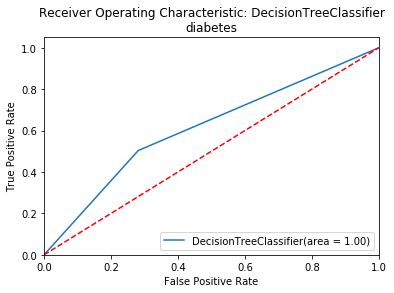

f1=0.313 auc=0.401


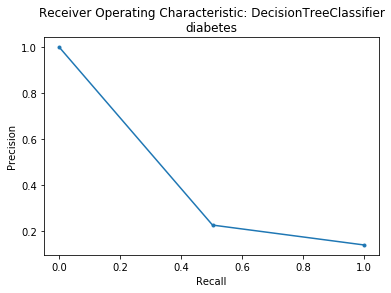

Performance Graphics for: diabetes 

Model: RandomForestClassifier 

ROC AUC for Model: RandomForestClassifier and Disease: diabetes = 0.9999926023465358


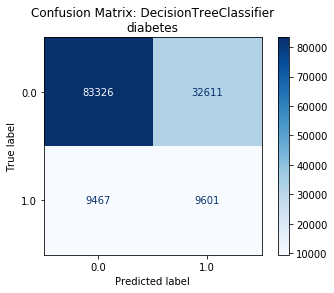

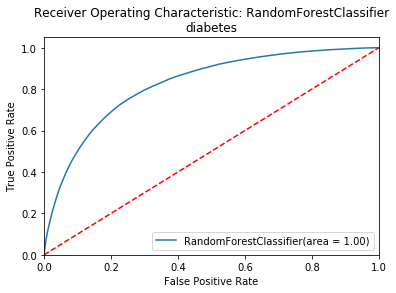

f1=0.471 auc=0.447


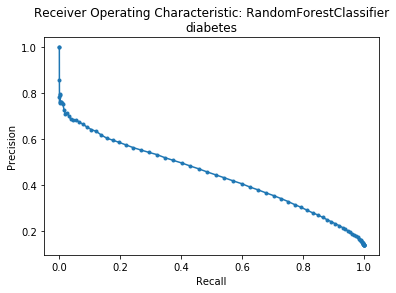

C:\Users\megha\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Performance Graphics for: hypertension 

Model: LogisticRegression 

ROC AUC for Model: LogisticRegression and Disease: hypertension = 0.7893127377840125


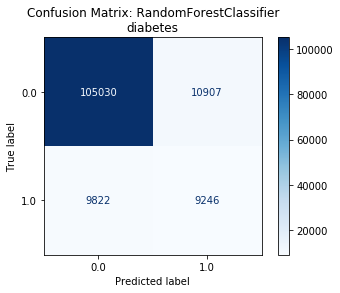

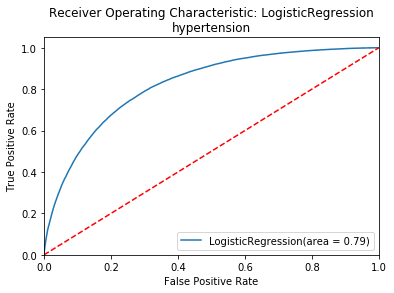

f1=0.688 auc=0.741


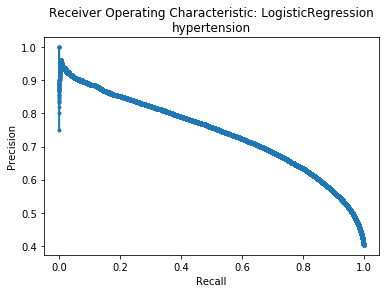

Performance Graphics for: hypertension 

Model: GaussianNB 

ROC AUC for Model: GaussianNB and Disease: hypertension = 0.6749585538481158


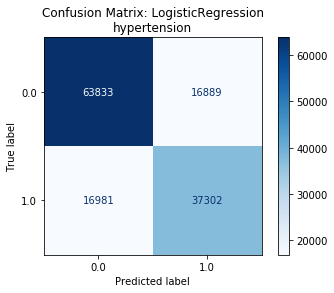

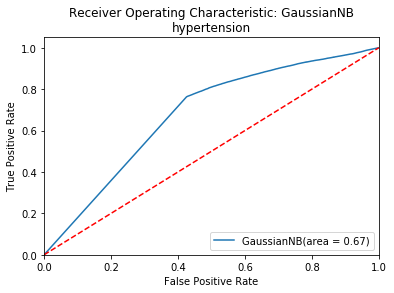

f1=0.631 auc=0.702


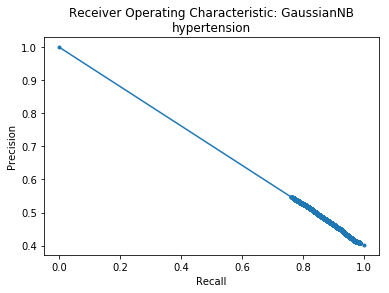

Performance Graphics for: hypertension 

Model: DecisionTreeClassifier 

ROC AUC for Model: DecisionTreeClassifier and Disease: hypertension = 1.0


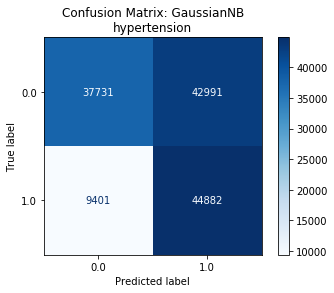

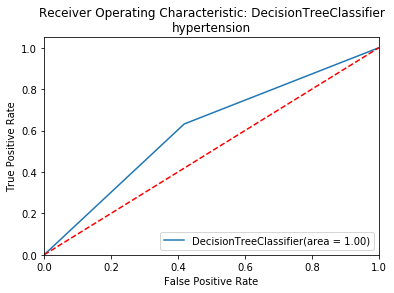

f1=0.561 auc=0.642


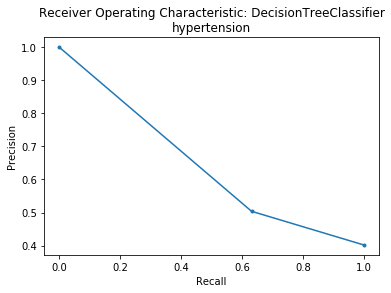

Performance Graphics for: hypertension 

Model: RandomForestClassifier 

ROC AUC for Model: RandomForestClassifier and Disease: hypertension = 0.9999920295861762


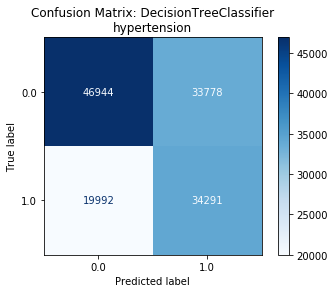

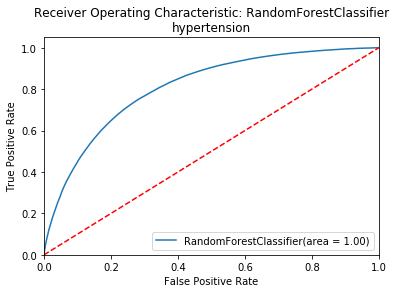

f1=0.696 auc=0.719


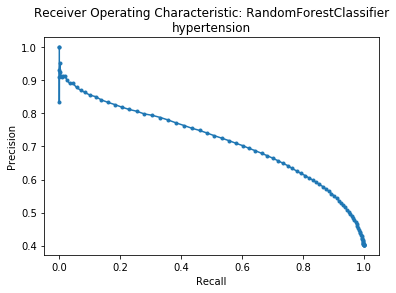

C:\Users\megha\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Performance Graphics for: heart 

Model: LogisticRegression 

ROC AUC for Model: LogisticRegression and Disease: heart = 0.9517863976343711


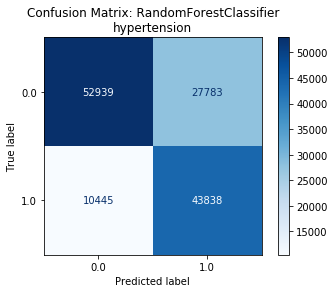

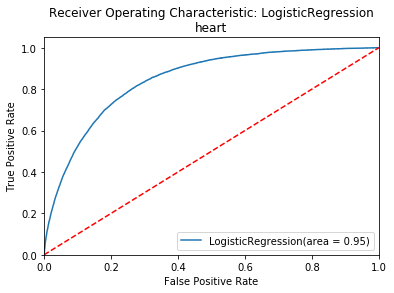

f1=0.346 auc=0.353


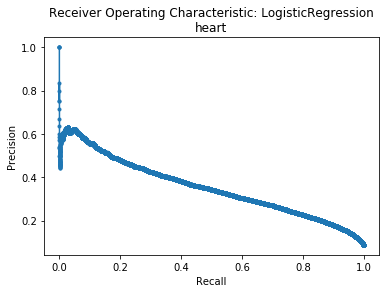

Performance Graphics for: heart 

Model: GaussianNB 

ROC AUC for Model: GaussianNB and Disease: heart = 0.8397808314489477


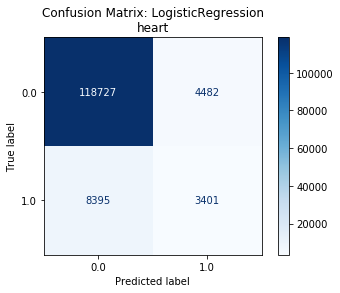

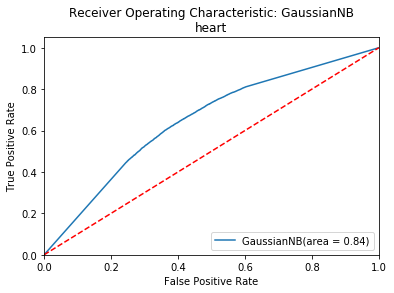

f1=0.224 auc=0.320


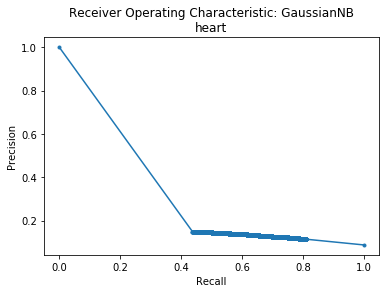

Performance Graphics for: heart 

Model: DecisionTreeClassifier 

ROC AUC for Model: DecisionTreeClassifier and Disease: heart = 1.0


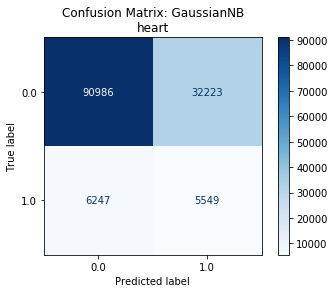

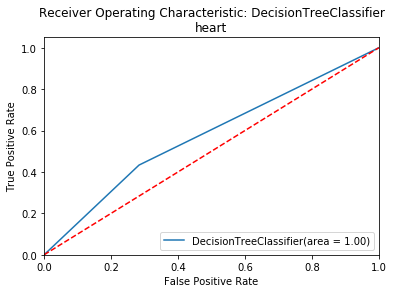

f1=0.197 auc=0.305


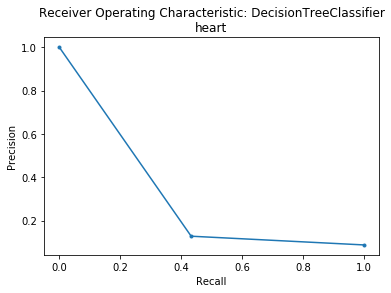

Performance Graphics for: heart 

Model: RandomForestClassifier 

ROC AUC for Model: RandomForestClassifier and Disease: heart = 0.9999913028352757


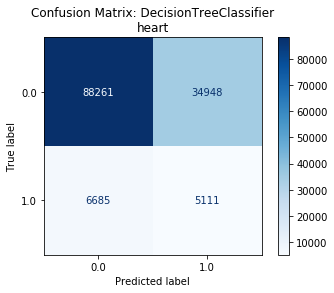

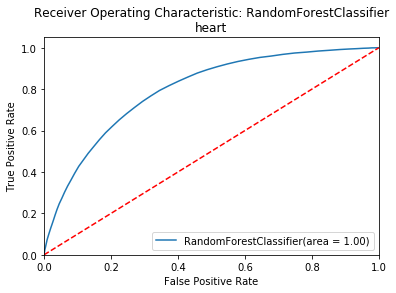

f1=0.287 auc=0.270


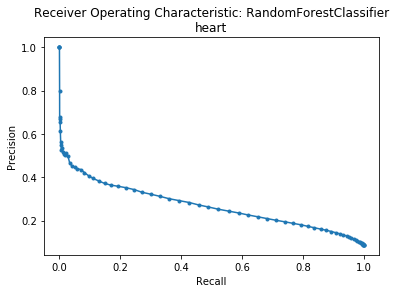

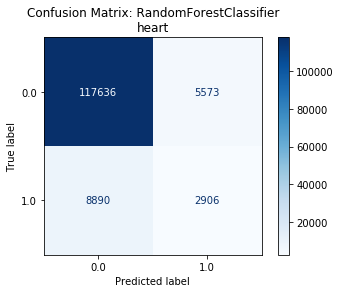

In [7]:
# Calling generate_performance_graphics

diseases = ['diabetes', 'hypertension', 'heart']
diseases = list(itertools.chain.from_iterable(itertools.repeat(i, 4) for i in diseases))

models = ['LogisticRegression', 'GaussianNB', 'DecisionTreeClassifier', 'RandomForestClassifier']*4

for disease, model in zip(diseases, models):
    graphics = generate_performance_graphics(disease, model)
    print('Performance Graphics for:', disease, '\n')
    print('Model:', model, '\n')
    graphics.plot_ROC(disease, model)
    graphics.plot_PR(disease, model)
    graphics.plot_confusion_matrices(disease, model)
    #graphics.plot_feature_importance(disease, model)